In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data.csv')  # Replace with the actual file name
df.head()  # Show the first few rows of the dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()  # Overview of the dataset (columns, data types, etc.)
df.describe()  # Summary statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [4]:
df.isnull().sum()  # Check for missing values
df.dropna(inplace=True)  # Drop rows with missing values (basic cleanup)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Step 3: Exploratory Data Analysis (EDA)

# 3.1 Sales Trends Over Time (Monthly Sales)
df['Month'] = df['Date'].dt.to_period('M')  # Extract the month for time series analysis
monthly_sales = df.groupby('Month')['Total'].sum()  # Calculate total sales per month

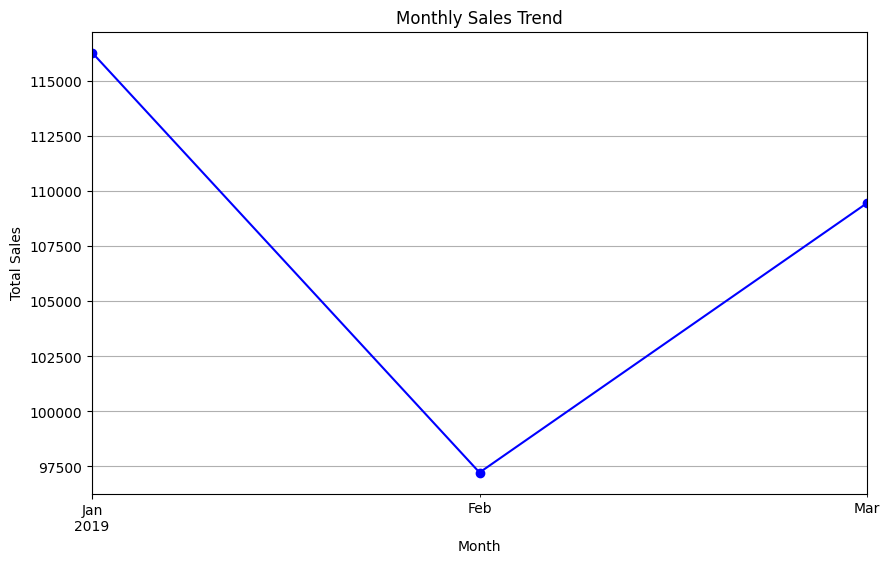

In [8]:
# Plotting Monthly Sales Trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(title='Monthly Sales Trend', marker='o', color='b')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

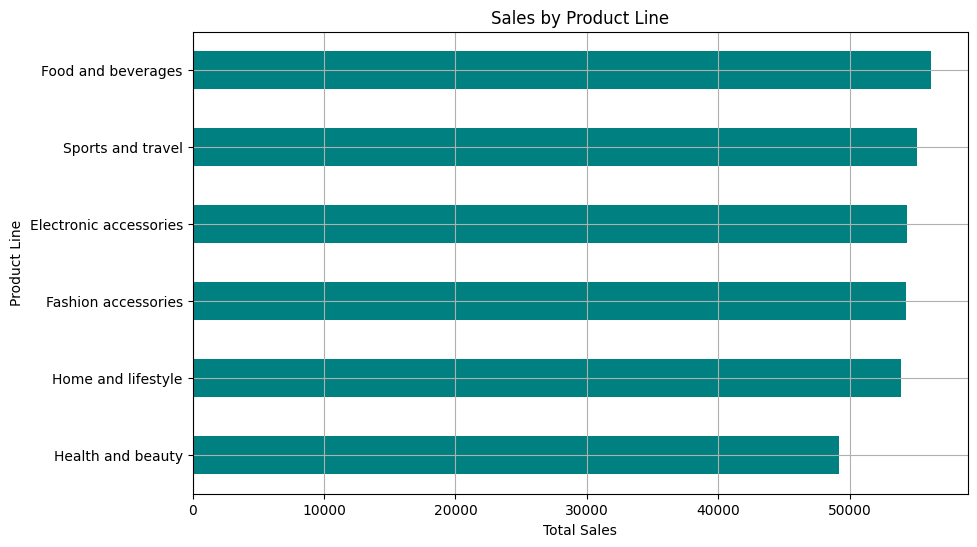

In [9]:
# 3.2 Sales by Product Line
plt.figure(figsize=(10, 6))
df.groupby('Product line')['Total'].sum().sort_values().plot(kind='barh', color='teal')  # Sum sales by product line
plt.title('Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.grid(True)
plt.show()

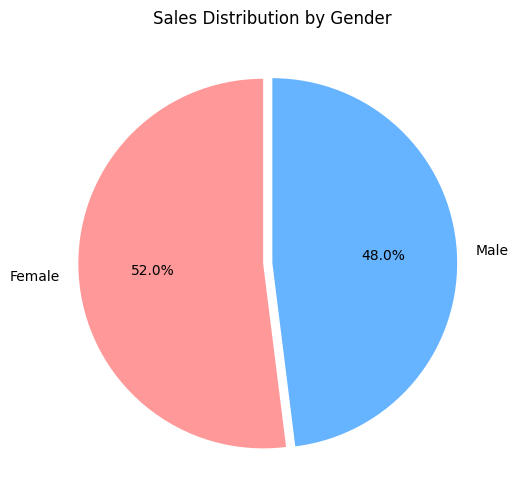

In [10]:
# 3.3 Gender-Based Purchasing Patterns
gender_sales = df.groupby('Gender')['Total'].sum()  # Sum sales by gender

# Plotting Gender-based Sales Distribution
plt.figure(figsize=(6, 6))
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title('Sales Distribution by Gender')
plt.ylabel('')
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_5340\4013990183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment', palette='Set2', order=df['Payment'].value_counts().index)  # Count sales by payment method


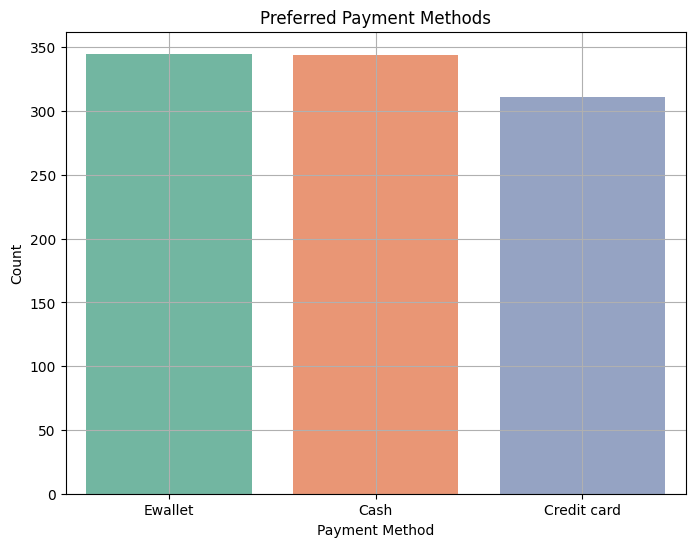

In [11]:
# 3.4 Preferred Payment Methods
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Payment', palette='Set2', order=df['Payment'].value_counts().index)  # Count sales by payment method
plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.grid(True)
plt.show()